In [1]:
import numpy as np
import scipy.sparse as sps
import porepy as pp

In [2]:
import sys
sys.path.append("./class")
from Transport_class import Transport
from Reaction_class import Reaction
from Concentrations import Concentrations

/home/dell/anaconda3/lib/python3.8/site-packages/porepy/viz/plot_grid.py:241: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_zlim3d(z)


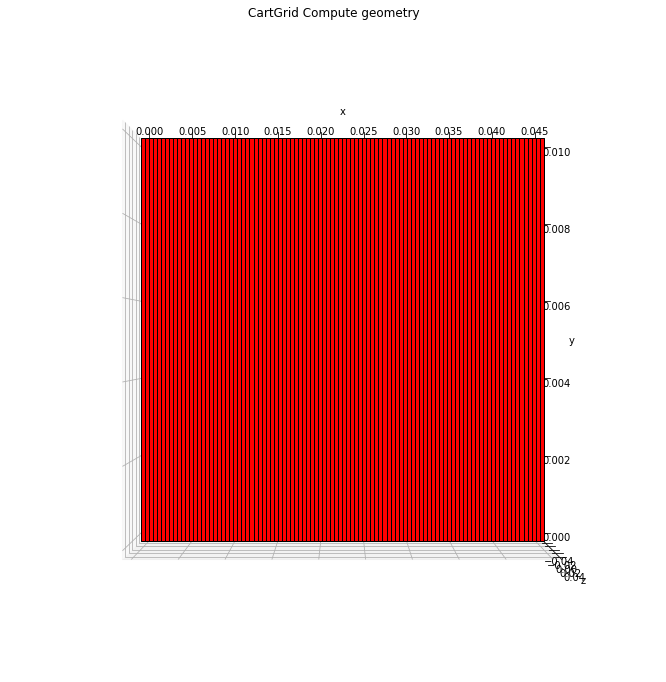

In [3]:
#QUESTIONE DATI
Nx=100
Ny=1
Nt=10000
Lx=0.045
Ly=0.01
hx=Lx/Nx
hy=Ly/Ny
phys_dims=[Lx,Ly]
g=pp.CartGrid([Nx,Ny],phys_dims)
g.compute_geometry()
pp.plot_grid(g,figsize=(15,12))
#pp.plot_grid(g)

In [4]:
psi1=np.zeros(g.num_cells)
psi2=np.zeros(g.num_cells)
psi3=np.zeros(g.num_cells)
psi4=np.zeros(g.num_cells)
psi5=np.zeros(g.num_cells)
psi6=np.zeros(g.num_cells)
rd=np.zeros(g.num_cells)

In [5]:
unity = np.ones(g.num_cells)
porosity=0.3*unity
aperture=1

In [6]:
reaction_data={"kd":1.83e-7,
               #"kd":0.0,
               "K_eq":4.45e-7,
               "K_sol":10e9,
               "porosity":porosity }

In [7]:
reaction=Reaction(g,reaction_data)

In [8]:
K_eq=reaction.data[pp.PARAMETERS]["reaction"]["K_eq"]

In [9]:
bc_type_Ca=["dir","dir"]
bc_value_Ca=[0.0,0.0]
#init_cond_Ca=lambda x,y,z:int(x<0.5)
init_cond_Ca=lambda x,y,z:0.0

bc_type_CaSiO3=["dir","dir"]
bc_value_CaSiO3=[0.0,0.0]
#init_cond_CaSiO3=lambda x,y,z:int(x<0.5)
init_cond_CaSiO3=lambda x,y,z:1.0

bc_type_CO2=["dir","dir"]
bc_value_CO2=[0.3691108,0.0]
#init_cond_Ca=lambda x,y,z:int(x<0.5)
init_cond_CO2=lambda x,y,z:1.0e-3

bc_type_SiO2=["dir","dir"]
bc_value_SiO2=[0.0,0.0]
#init_cond_Ca=lambda x,y,z:int(x<0.5)
init_cond_SiO2=lambda x,y,z:0.0

bc_type_H_piu=["dir","dir"]
bc_value_H_piu=[1.0e-5,0.0]
#init_cond_Ca=lambda x,y,z:int(x<0.5)
init_cond_H_piu=lambda x,y,z:1.0e-7



bc_HCO3_in=K_eq*bc_value_CO2[0]/bc_value_H_piu[0]
print("bc_HCO3_in=")
print(bc_HCO3_in)
#bc_HCO3_out=K_eq*bc_value_CO2[1]/bc_value_H_piu[1]
bc_HCO3_out=0.0

bc_type_HCO3=["dir","dir"]
bc_value_HCO3=[bc_HCO3_in,bc_HCO3_out]
#init_cond_Ca=lambda x,y,z:int(x<0.5)
init_cond_HCO3=lambda x,y,z:0.0

bc_HCO3_in=
0.0164254306


In [10]:
data_6reagents = {"bc_type_Ca": bc_type_Ca,
            "bc_value_Ca": bc_value_Ca,
            "bc_type_CO2": bc_type_CO2,
            "bc_value_CO2": bc_value_CO2,
            "bc_type_HCO3": bc_type_HCO3,
            "bc_value_HCO3": bc_value_HCO3,
            "bc_type_CaSiO3": bc_type_CaSiO3,
            "bc_value_CaSiO3": bc_value_CaSiO3,
            "bc_type_SiO2": bc_type_SiO2,
            "bc_value_SiO2": bc_value_SiO2,
            "bc_type_H_piu": bc_type_H_piu,
            "bc_value_H_piu": bc_value_H_piu,
            "time_step": 34.56,
            "t_max": 345600,
            "method": "Implicit",
            "lambda_lin_decay":0,
            "init_cond_Ca":init_cond_Ca,
            "init_cond_CO2":init_cond_CO2,
            "init_cond_CaSiO3":init_cond_CaSiO3,
            "init_cond_SiO2":init_cond_SiO2,
            "init_cond_HCO3":init_cond_HCO3,
            "init_cond_H_piu":init_cond_H_piu,}

In [11]:
concentrations=Concentrations(g,Nt,data_6reagents)
concentrations.set_initial_cond(K_eq)

In [12]:
psi1,psi2,psi3,psi4,psi5=concentrations.compute_psi(0,psi1,psi2,psi3,psi4,psi5)

In [13]:
bc_psi1,bc_psi2,bc_psi3,bc_psi4,bc_psi5=concentrations.set_bc_psi()

In [14]:
data_reagent_psi1= {
            "bc_type": bc_type_Ca,
            "bc_value": bc_psi1,
            "mass_weight": porosity * aperture,
            "darcy_flux":np.zeros(g.num_faces),
            "lambda_lin_decay":0.,
            "method": "Implicit",
            "time_step": 34.56,
            "t_max": 345600,
}

data_reagent_psi2= {
            "bc_type": bc_type_H_piu,
            "bc_value": bc_psi2,
            "mass_weight": porosity * aperture,
            "darcy_flux":np.zeros(g.num_faces),
            "lambda_lin_decay":0.,
            "method": "Implicit",
            "time_step": 34.56,
            "t_max": 345600,
}

data_reagent_psi3= {
            "bc_type": bc_type_CO2,
            "bc_value": bc_psi3,
            "mass_weight": porosity * aperture,
            "darcy_flux":np.zeros(g.num_faces),
            "lambda_lin_decay":0.,
            "method": "Implicit",
            "time_step": 34.56,
            "t_max": 345600,
}

data_reagent_psi4= {
            "bc_type": bc_type_CaSiO3,
            "bc_value": bc_psi4,
            "mass_weight": porosity * aperture,
            "darcy_flux":np.zeros(g.num_faces),
            "lambda_lin_decay":0.,
            "method": "Implicit",
            "time_step": 34.56,
            "t_max": 345600,
}

data_reagent_psi5= {
            "bc_type": bc_type_SiO2,
            "bc_value": bc_psi5,
            "mass_weight": porosity * aperture,
            "darcy_flux":np.zeros(g.num_faces),
            "lambda_lin_decay":0.,
            "method": "Implicit",
            "time_step": 34.56,
            "t_max": 345600,
}

In [15]:
data_reagent_psi1["darcy_flux"][:(Nx+1)*Ny]=hy*6.67e-9
data_reagent_psi2["darcy_flux"][:(Nx+1)*Ny]=hy*6.67e-9
data_reagent_psi3["darcy_flux"][:(Nx+1)*Ny]=hy*6.67e-9
data_reagent_psi5["darcy_flux"][:(Nx+1)*Ny]=hy*6.67e-9

In [16]:
print(data_reagent_psi5["darcy_flux"])

[6.67e-11 6.67e-11 6.67e-11 6.67e-11 6.67e-11 6.67e-11 6.67e-11 6.67e-11
 6.67e-11 6.67e-11 6.67e-11 6.67e-11 6.67e-11 6.67e-11 6.67e-11 6.67e-11
 6.67e-11 6.67e-11 6.67e-11 6.67e-11 6.67e-11 6.67e-11 6.67e-11 6.67e-11
 6.67e-11 6.67e-11 6.67e-11 6.67e-11 6.67e-11 6.67e-11 6.67e-11 6.67e-11
 6.67e-11 6.67e-11 6.67e-11 6.67e-11 6.67e-11 6.67e-11 6.67e-11 6.67e-11
 6.67e-11 6.67e-11 6.67e-11 6.67e-11 6.67e-11 6.67e-11 6.67e-11 6.67e-11
 6.67e-11 6.67e-11 6.67e-11 6.67e-11 6.67e-11 6.67e-11 6.67e-11 6.67e-11
 6.67e-11 6.67e-11 6.67e-11 6.67e-11 6.67e-11 6.67e-11 6.67e-11 6.67e-11
 6.67e-11 6.67e-11 6.67e-11 6.67e-11 6.67e-11 6.67e-11 6.67e-11 6.67e-11
 6.67e-11 6.67e-11 6.67e-11 6.67e-11 6.67e-11 6.67e-11 6.67e-11 6.67e-11
 6.67e-11 6.67e-11 6.67e-11 6.67e-11 6.67e-11 6.67e-11 6.67e-11 6.67e-11
 6.67e-11 6.67e-11 6.67e-11 6.67e-11 6.67e-11 6.67e-11 6.67e-11 6.67e-11
 6.67e-11 6.67e-11 6.67e-11 6.67e-11 6.67e-11 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e

In [17]:
psi1_transport=Transport(g,data_reagent_psi1)
#psi1=psi1_transport.set_bc(psi1)
psi1_transport.set_bc()
psi1_lhs,psi1_rhs_b,psi1_rhs_matrix=psi1_transport.get_transport_lhs_rhs()

psi2_transport=Transport(g,data_reagent_psi2)
#psi2=psi2_transport.set_bc(psi2)
psi2_transport.set_bc()
psi2_lhs,psi2_rhs_b,psi2_rhs_matrix=psi2_transport.get_transport_lhs_rhs()

psi3_transport=Transport(g,data_reagent_psi3)
#psi3=psi3_transport.set_bc(psi3)
psi3_transport.set_bc()
psi3_lhs,psi3_rhs_b,psi3_rhs_matrix=psi3_transport.get_transport_lhs_rhs()

psi4_transport=Transport(g,data_reagent_psi4)
#psi4=psi4_transport.set_bc(psi4)
psi4_transport.set_bc()
psi4_lhs,psi4_rhs_b,psi4_rhs_matrix=psi4_transport.get_transport_lhs_rhs()

psi5_transport=Transport(g,data_reagent_psi5)
#psi5=psi5_transport.set_bc(psi5)
psi5_transport.set_bc()
psi5_lhs,psi5_rhs_b,psi5_rhs_matrix=psi5_transport.get_transport_lhs_rhs()

In [18]:
n_steps = int(np.round(concentrations.data[pp.PARAMETERS]["6reagents"]["t_max"] / concentrations.data[pp.PARAMETERS]["6reagents"]["time_step"]))

In [19]:
dt=psi1_transport.data[pp.PARAMETERS]["transport"]["time_step"]

In [20]:
save_every=100
exporter = pp.Exporter(g, file_name="6_reagents",folder_name="solution_6_reagents_2D")

In [21]:
print("Ca:")
print(concentrations.Ca[:,0])
print("CaSiO3:")
print(concentrations.CaSiO3[:,0])
print("H_piu:")
print(concentrations.H_piu[:,0])
print("CO2:")
print(concentrations.CO2[:,0])

Ca:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
CaSiO3:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
H_piu:
[1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07
 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07
 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07
 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07
 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07
 1.e-07 1.e-07

In [22]:
for i in range(1,n_steps+1,1):
#for i in range(1,500,1):
    if np.isclose((i-1) % save_every, 0):
        exporter.write_vtu({"Ca":concentrations.Ca[:,i-1], "CaSiO3":concentrations.CaSiO3[:,i-1], "H_piu":concentrations.H_piu[:,i-1], "HCO3":concentrations.HCO3[:,i-1], "CO2":concentrations.CO2[:,i-1],"SiO2":concentrations.SiO2[:,i-1]}, time_step=int((i-1) // save_every))

    psi1,psi2,psi3,psi4,psi5=concentrations.compute_psi(i-1,psi1,psi2,psi3,psi4,psi5)
    rd=reaction.compute_rd_6_reagents(concentrations.Ca[:,i-1],concentrations.SiO2[:,i-1],concentrations.H_piu[:,i-1],concentrations.CaSiO3[:,i-1],rd,hx,hy)
    psi1,psi2,psi3,psi4,psi5=concentrations.one_step_transport_reaction(psi1,psi2,psi3,psi4,psi5,
                                               psi1_lhs,psi1_rhs_b,psi1_rhs_matrix,
                                               psi2_lhs,psi2_rhs_b,psi2_rhs_matrix,
                                               psi3_lhs,psi3_rhs_b,psi3_rhs_matrix,
                                               psi4_lhs,psi4_rhs_b,psi4_rhs_matrix,
                                               psi5_lhs,psi5_rhs_b,psi5_rhs_matrix,
                                               rd)
    
    concentrations.compute_concentration(psi1,psi2,psi3,psi4,psi5,i,K_eq)



exporter.write_vtu({"Ca":concentrations.Ca[:,-1], "CaSiO3":concentrations.CaSiO3[:,-1], "H_piu":concentrations.H_piu[:,-1], "HCO3":concentrations.HCO3[:,-1], "CO2":concentrations.CO2[:,-1],"SiO2":concentrations.SiO2[:,-1]}, time_step=(n_steps // save_every))
time_steps = np.arange(
    0, psi1_transport.data[pp.PARAMETERS]["transport"]["t_max"] + dt, save_every * dt
)
exporter.write_pvd(time_steps)
    

/home/dell/.local/lib/python3.8/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:318: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)


In [23]:
print("Ca=")
print(concentrations.Ca[:,-1])
print("CaSiO3=")
print(concentrations.CaSiO3[:,-1])
print("CO2=")
print(concentrations.CO2[:,-1])
print("HCO3=")
print(concentrations.HCO3[:,-1])
print("SiO2=")
print(concentrations.SiO2[:,-1])
print("H_piu=")
print(concentrations.H_piu[:,-1])

Ca=
[0.00348976 0.00699198 0.01050638 0.01403579 0.01757901 0.02113147
 0.02468333 0.02821604 0.03169656 0.0350684  0.03823874 0.04106263
 0.04333012 0.0447702  0.04509074 0.04406117 0.04161035 0.03788364
 0.03321888 0.02805504 0.02282677 0.01789107 0.01349941 0.00980084
 0.00685461 0.00464093 0.00307453 0.00202889 0.00136741 0.00096862
 0.00073828 0.00061026 0.00054155 0.00050587 0.0004879  0.00047911
 0.00047494 0.00047301 0.00047214 0.00047176 0.00047159 0.00047152
 0.0004715  0.00047149 0.00047148 0.00047148 0.00047148 0.00047148
 0.00047148 0.00047148 0.00047148 0.00047148 0.00047148 0.00047148
 0.00047148 0.00047148 0.00047148 0.00047148 0.00047148 0.00047148
 0.00047148 0.00047148 0.00047148 0.00047148 0.00047148 0.00047148
 0.00047148 0.00047148 0.00047148 0.00047148 0.00047148 0.00047148
 0.00047148 0.00047148 0.00047148 0.00047148 0.00047148 0.00047148
 0.00047148 0.00047148 0.00047148 0.00047148 0.00047148 0.00047148
 0.00047148 0.00047148 0.00047148 0.00047148 0.00047148 0.

In [24]:
exporter.write_pvd(time_steps)